In [1]:
cd ../src

/home/richard/Desktop/software/epicluster-results_upload/epicluster-results/src


In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import copy
import scipy.stats
import branchpro
import epicluster as ec

In [3]:
random.seed(123)
np.random.seed(123)

In [4]:
sigmas = [0.9, 0.5, 0.0]
thetas = [1e-4, 1e-1, 10]

# serial interval
serial_interval = pd.read_csv("../data/raw/covid_serial_interval.csv")
w = serial_interval['w']
w = w[:20]
w = w / sum(w)

# data
data = pd.read_csv("../data/synthetic/synthetic3_slowdropoff.csv")
Rt_series = np.asarray(data['Rt'])
cases = np.asarray(data['cases'])

past_cases = np.zeros(len(w))
past_cases[-1] = 5
past_cases[-2] = 5
past_cases[-3] = 5
inf_cases = np.concatenate([past_cases, cases])


In [5]:

results = []
values = []
for sigma in sigmas:
    for theta in thetas:
        # run change point
        p = ec.PoissonModel(copy.deepcopy(inf_cases), w, hyper_sigma=sigma, hyper_theta=theta)
        mcmc = ec.MCMCSampler(p, 2)
        phi_chain, z_chain, counts = mcmc.run_mcmc(Rhat_thresh=1.05, progress=True)

        results.append([phi_chain, z_chain])
        values.append((sigma, theta))



Iter=50, Rhat=23.46960730747277
Iter=100, Rhat=13.292882775533547
Iter=150, Rhat=7.193008236067495
Iter=200, Rhat=5.3131723653835445
Iter=250, Rhat=4.585637424842655
Iter=300, Rhat=3.5396136891838514
Iter=350, Rhat=2.2929417918782384
Iter=400, Rhat=2.3420073206314425
Iter=450, Rhat=2.2655170603556183
Iter=500, Rhat=1.881045329994776
Iter=550, Rhat=1.87292133374995
Iter=600, Rhat=1.732965037848286
Iter=650, Rhat=1.4308322161309024
Iter=700, Rhat=1.3568933595989154
Iter=750, Rhat=1.4372214147528637
Iter=800, Rhat=1.4142907219989747
Iter=850, Rhat=1.6231207496805025
Iter=900, Rhat=1.463271578119903
Iter=950, Rhat=1.2990550940311643
Iter=1000, Rhat=1.2467440980666826
Iter=1050, Rhat=1.1884732493671646
Iter=1100, Rhat=1.11017525357745
Iter=1150, Rhat=1.0414030689563583
Converged 1150 1.0414030689563583
Iter=50, Rhat=17.55171014517604
Iter=100, Rhat=12.44197091557549
Iter=150, Rhat=8.29969841070782
Iter=200, Rhat=6.329983241816037
Iter=250, Rhat=5.92158121069037
Iter=300, Rhat=4.246742849016

Iter=600, Rhat=1.111550569060776
Iter=650, Rhat=1.1936040952946037
Iter=700, Rhat=1.2836373494828726
Iter=750, Rhat=1.1113736357878787
Iter=800, Rhat=1.0640600597499388
Iter=850, Rhat=1.0504575081010987
Iter=900, Rhat=1.0607167716191064
Iter=950, Rhat=1.1219049500708325
Iter=1000, Rhat=1.2298045144535446
Iter=1050, Rhat=1.2489989139785123
Iter=1100, Rhat=1.19853766888608
Iter=1150, Rhat=1.2007360755768892
Iter=1200, Rhat=1.1586848736876247
Iter=1250, Rhat=1.102890762423885
Iter=1300, Rhat=1.0348160644728488
Converged 1300 1.0348160644728488
Iter=50, Rhat=14.72893407840239
Iter=100, Rhat=6.209278321401333
Iter=150, Rhat=3.9585963411294354
Iter=200, Rhat=3.2578787997125658
Iter=250, Rhat=1.8988018503047586
Iter=300, Rhat=1.730510419917311
Iter=350, Rhat=1.5224185564760109
Iter=400, Rhat=1.302504512252112
Iter=450, Rhat=1.2623681369732034
Iter=500, Rhat=1.2184042569711917
Iter=550, Rhat=1.1728536322916785
Iter=600, Rhat=1.3050651721180218
Iter=650, Rhat=1.1202732660896089
Iter=700, Rhat=1

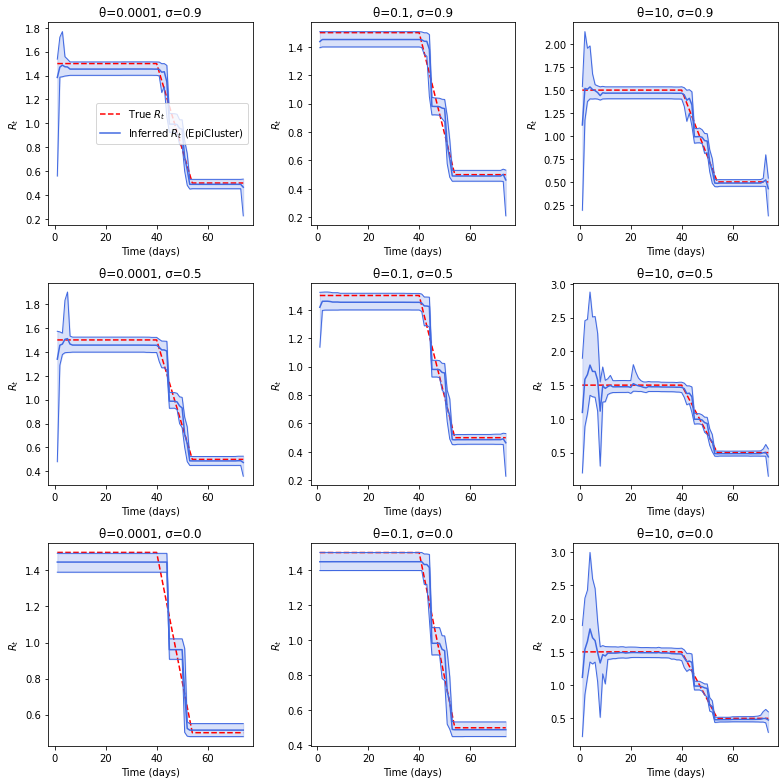

In [6]:
fig = plt.figure(figsize=(11,11))

num_exps = len(thetas) * len(sigmas)

for i in range(num_exps):
    
    
    phi_chain, z_chain = results[i]
    
    ax = fig.add_subplot(len(thetas), len(sigmas), 1+i)

    x = np.arange(len(cases))
    sd = 1
    
    Rs = []
    num_mcmc = len(z_chain)
    for phi, z in zip(phi_chain[num_mcmc//4:], z_chain[num_mcmc//4:]):
        Rs.append([phi[zi] for zi in z][sd:])
        
    ax.plot(x[sd:], Rt_series[sd:], color='red', label='True $R_t$', ls='--')
    ax.plot(x[sd:], np.mean(Rs, axis=0), color='royalblue', label='Inferred $R_t$ (EpiCluster)')
    ax.fill_between(x[sd:], np.percentile(Rs, 5, axis=0), np.percentile(Rs, 95, axis=0), color='royalblue', alpha=0.2)
    ax.plot(x[sd:], np.percentile(Rs, 5, axis=0), color='royalblue', lw=1)
    ax.plot(x[sd:], np.percentile(Rs, 95, axis=0), color='royalblue', lw=1)
    
    if i == 0:
        ax.legend()
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('$R_t$')
    
    ax.set_title('θ={}, σ={}'.format(values[i][1], values[i][0]))

    

fig.set_tight_layout(True)


plt.savefig('../notebooks/FigureS2.pdf')
plt.show()
